In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot, norm, levene, ttest_ind, mannwhitneyu, chi2_contingency, kruskal, gaussian_kde
import scipy.stats as stats

df = pd.read_csv('Heart_disease_statlog.csv')

In [5]:
heart_disease = df[df['target'] == 1]
no_heart_disease = df[df['target'] == 0]

In [7]:
heart_disease_resting_blood_pressure = heart_disease['trestbps'].to_numpy()
no_heart_disease_resting_blood_pressure = no_heart_disease['trestbps'].to_numpy()

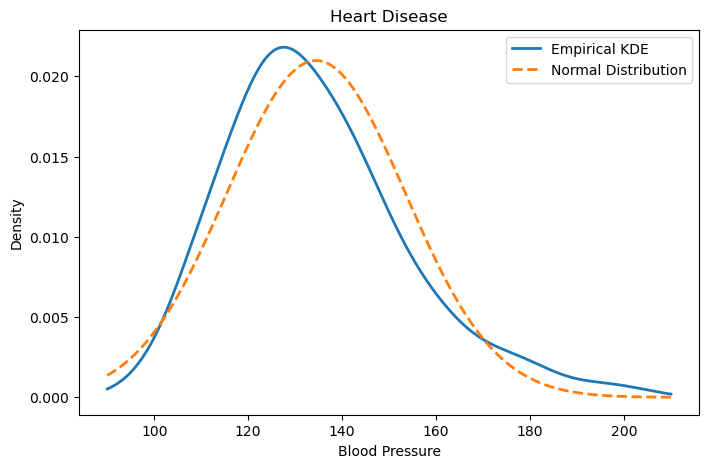

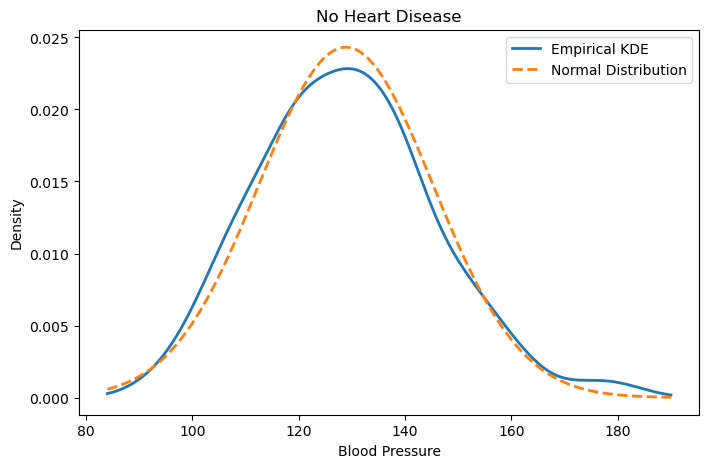

In [9]:
def plot_kde_vs_normal(data, title):
    
    mu, std = np.mean(data), np.std(data)
    x = np.linspace(min(data) - 10, max(data) + 10, 1000)

    normal_pdf = norm.pdf(x, mu, std)

    kde = gaussian_kde(data)

    plt.figure(figsize=(8, 5))
    plt.plot(x, kde(x), label='Empirical KDE', linewidth=2)
    plt.plot(x, normal_pdf, '--', label='Normal Distribution', linewidth=2)
    plt.title(title)
    plt.xlabel('Blood Pressure')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

plot_kde_vs_normal(heart_disease_resting_blood_pressure, 'Heart Disease')
plot_kde_vs_normal(no_heart_disease_resting_blood_pressure, 'No Heart Disease')

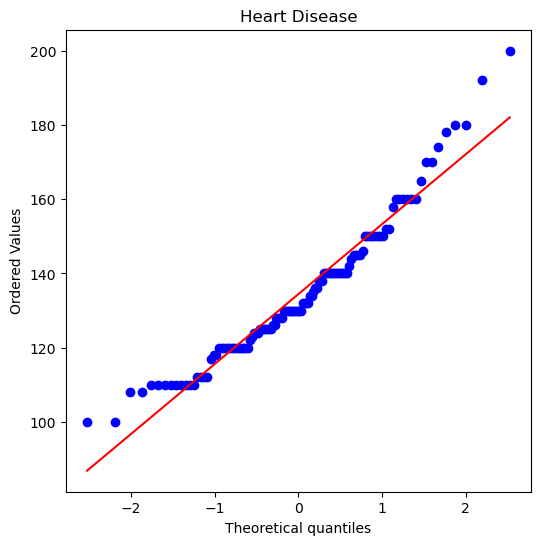

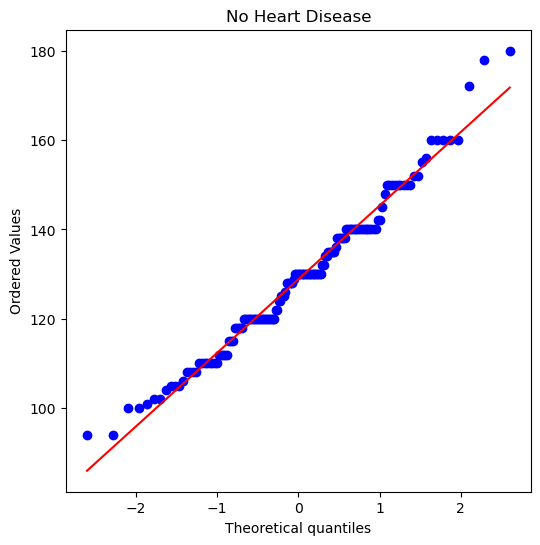

In [11]:
def plot_qq(data, title):
    plt.figure(figsize=(6, 6))
    probplot(data, dist="norm", plot=plt)
    plt.title(f'{title}')
    plt.show()

plot_qq(heart_disease_resting_blood_pressure, 'Heart Disease')
plot_qq(no_heart_disease_resting_blood_pressure, 'No Heart Disease')

In [13]:
stat, p = shapiro(heart_disease_resting_blood_pressure)
print(f'Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}')

Shapiro-Wilk test statistic = 0.9480, p-value = 0.0002


In [15]:
stat, p = shapiro(no_heart_disease_resting_blood_pressure)
print(f'Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}')

Shapiro-Wilk test statistic = 0.9790, p-value = 0.0213


In [17]:
stat, p = mannwhitneyu(
    heart_disease_resting_blood_pressure,
    no_heart_disease_resting_blood_pressure,
    alternative='greater'
)

print(f"Mann–Whitney U statistic = {stat:.4f}, p-value = {p:.4f}")

Mann–Whitney U statistic = 10367.5000, p-value = 0.0158


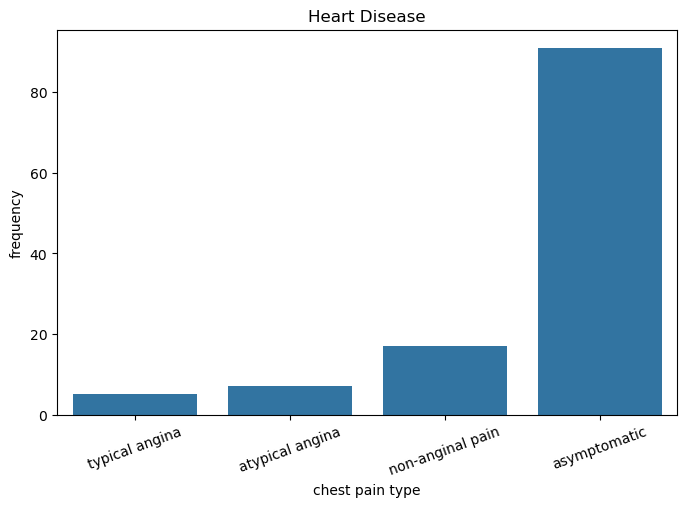

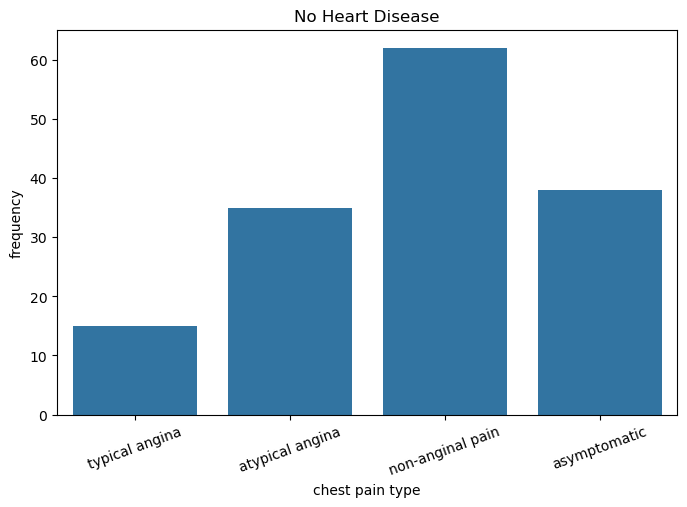

In [20]:
cp_labels = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
}

df['cp_label'] = df['cp'].map(cp_labels)

heart_disease = df[df['target'] == 1]
no_heart_disease = df[df['target'] == 0]

plt.figure(figsize=(8, 5))
sns.countplot(x='cp_label', data=heart_disease, order=cp_labels.values())
plt.title('Heart Disease')
plt.xlabel('chest pain type')
plt.ylabel('frequency')
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='cp_label', data=no_heart_disease, order=cp_labels.values())
plt.title('No Heart Disease')
plt.xlabel('chest pain type')
plt.ylabel('frequency')
plt.xticks(rotation=20)
plt.show()

In [22]:
contingency_table = pd.crosstab(df['cp'], df['target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

Chi-squared test statistic = 68.5882
p-value = 0.0000


Confusion Matrix:
[[33  0]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.86      0.92        21

    accuracy                           0.94        54
   macro avg       0.96      0.93      0.94        54
weighted avg       0.95      0.94      0.94        54

AUC: 0.929


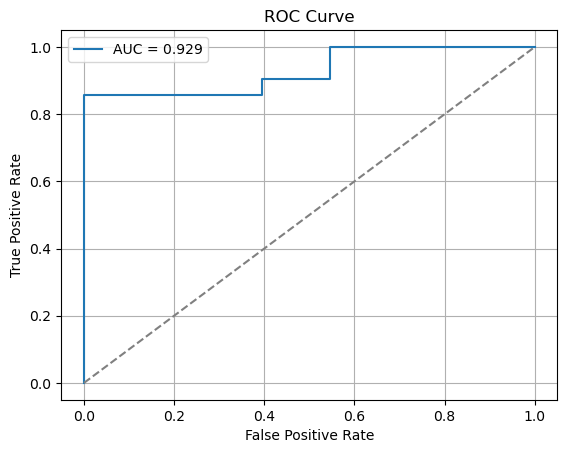

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# טעינת הנתונים
df = pd.read_csv('Heart_disease_statlog.csv')

# הסרת עמודות לא רלוונטיות
df = df.drop(columns=['age', 'sex'])  # אם רוצים להשתמש רק במאפיינים פיזיולוגיים

# הגדרת משתנים
X = df.drop(columns=['target'])
y = df['target']

# פיצול ל־Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# בניית המודל
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# תחזיות
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# דיווח תוצאות
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.3f}")

# עקומת ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

     Feature  Coefficient  Odds Ratio
9         ca     1.079828    2.944175
10      thal     0.905251    2.472552
6      exang     0.754694    2.126960
0         cp     0.530840    1.700360
8      slope     0.353408    1.423912
7    oldpeak     0.350705    1.420068
4    restecg     0.158434    1.171675
1   trestbps     0.002094    1.002097
2       chol     0.000070    1.000070
5    thalach    -0.027216    0.973151
3        fbs    -0.373117    0.688585


C:\Users\User\AppData\Local\Temp\ipykernel_996\2867809623.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Odds Ratio", y="Feature", data=coef_df, palette="Blues_d")


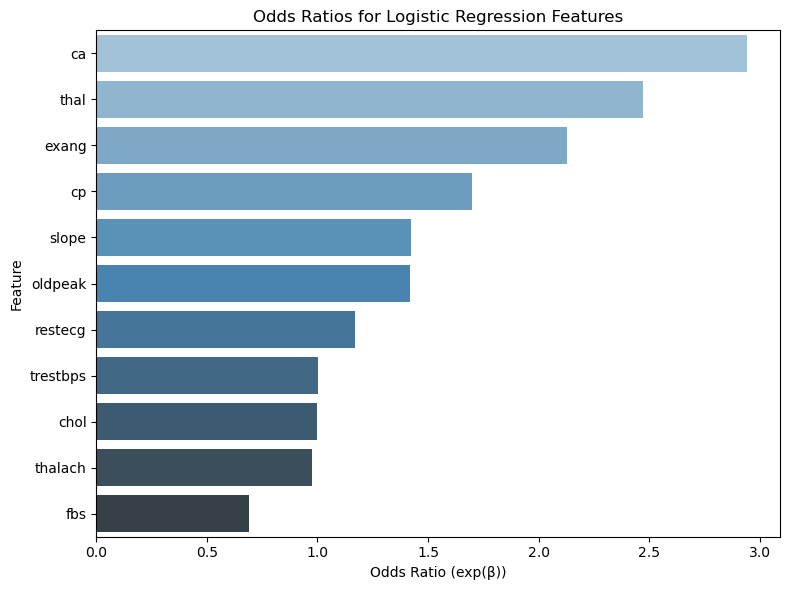

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# קריאת הנתונים
df = pd.read_csv("Heart_disease_statlog.csv")
df = df.drop(columns=["age", "sex"])

# משתני הסבר ומטרה
X = df.drop(columns=["target"])
y = df["target"]

# פיצול ל־train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# אימון רגרסיה לוגיסטית
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# מקדמים ו־odds ratios
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)
features = X.columns

# טבלה
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients,
    "Odds Ratio": odds_ratios
}).sort_values(by="Odds Ratio", ascending=False)

print(coef_df)

# גרף
plt.figure(figsize=(8, 6))
sns.barplot(x="Odds Ratio", y="Feature", data=coef_df, palette="Blues_d")
plt.title("Odds Ratios for Logistic Regression Features")
plt.xlabel("Odds Ratio (exp(β))")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()